#IS 470 Lab 3: Decision Tree

---

This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>
<br>
Target variable: **IsBadBuy**

###1. Upload and clean data

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:
# Read data
car_kick = pd.read_csv("/content/drive/MyDrive/IS470_data/car_kick.csv")
car_kick

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,IsBadBuy
0,1289952000,2006,4,51954,6197,7062,9605,10426,5341,6351,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1242691200,2005,4,89127,3688,4783,4483,5666,3688,4783,...,2,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1248220800,2006,3,71271,6897,8449,7949,9625,6868,8549,...,1,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1285718400,2008,2,83338,7878,8925,11723,13026,7801,8704,...,2,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1237334400,2007,2,58698,8800,10091,10004,11398,7355,8543,...,1,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,1285804800,2008,2,56072,6255,6972,9852,10567,6326,7126,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,22808,77061,TX,0,1
67207,1274918400,2004,6,94232,8359,9645,12042,13302,7505,8188,...,1,Alloy,'TOP LINE ASIAN','MEDIUM SUV',OTHER,17675,28273,NC,0,1
67208,1280448000,2004,6,79534,2805,3826,6132,6871,3106,4479,...,1,Alloy,AMERICAN,MEDIUM,GM,18880,37771,TN,0,1
67209,1285200000,2003,7,79394,4042,5296,7335,8983,3534,4732,...,2,Covers,AMERICAN,'MEDIUM SUV',GM,23657,92337,CA,0,1


In [4]:
car_kick.keys()

Index(['PurchDate', 'VehYear', 'VehicleAge', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'WarrantyCost', 'Auction', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'BYRNO', 'VNZIP1',
       'VNST', 'IsOnlineSale', 'IsBadBuy'],
      dtype='object')

In [5]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']
car_kick_desired = car_kick [desired_columns]

In [6]:
# Replacing 1 with Yes and 0 with No in the target column IsBadBuy
carAuction = car_kick_desired.copy() #why?  ... because we want to get rid of the other columns
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('object').replace({0: 'No', 1: 'Yes'})

In [7]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,No,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers
1,ADESA,SILVER,No,3688,MEDIUM,FORD,3680,4,89127,983,Covers
2,MANHEIM,RED,No,6868,LARGE,GM,7170,3,71271,1974,Alloy
3,MANHEIM,BLACK,No,7801,LARGE,GM,7670,2,83338,2152,Covers
4,ADESA,WHITE,No,7355,LARGE,GM,7165,2,58698,1500,Alloy


In [8]:
# Examine missing values again
carAuction.isnull().sum()

,0
Auction,0
Color,0
IsBadBuy,0
MMRCurrentAuctionAveragePrice,0
Size,0
TopThreeAmericanName,0
VehBCost,0
VehicleAge,0
VehOdo,0
WarrantyCost,0


In [9]:
# Examine variable type
carAuction.dtypes

,0
Auction,object
Color,object
IsBadBuy,object
MMRCurrentAuctionAveragePrice,int64
Size,object
TopThreeAmericanName,object
VehBCost,int64
VehicleAge,int64
VehOdo,int64
WarrantyCost,int64


In [10]:
# Display all numeric variables
carAuction.select_dtypes(include=['number'])

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
0,5341,6500,4,51954,1086
1,3688,3680,4,89127,983
2,6868,7170,3,71271,1974
3,7801,7670,2,83338,2152
4,7355,7165,2,58698,1500
...,...,...,...,...,...
67206,6326,6680,2,56072,1086
67207,7505,8265,6,94232,909
67208,3106,4950,6,79534,1506
67209,3534,5220,7,79394,3967


In [13]:
# Display all categorical variables
carAuction.select_dtypes(include=['category'])

,Auction,Color,IsBadBuy,Size,TopThreeAmericanName,WheelType
0,MANHEIM,SILVER,No,MEDIUM,CHRYSLER,Covers
1,ADESA,SILVER,No,MEDIUM,FORD,Covers
2,MANHEIM,RED,No,LARGE,GM,Alloy
3,MANHEIM,BLACK,No,LARGE,GM,Covers
4,ADESA,WHITE,No,LARGE,GM,Alloy
...,...,...,...,...,...,...
67206,MANHEIM,RED,Yes,MEDIUM,CHRYSLER,Covers
67207,ADESA,BLACK,Yes,'MEDIUM SUV',OTHER,Alloy
67208,ADESA,GOLD,Yes,MEDIUM,GM,Alloy
67209,MANHEIM,WHITE,Yes,'MEDIUM SUV',GM,Covers


Step 11 (above) was originally executed before the categorical variables where converted to 'category' date type.  I ran it at that time and got zero rows, but out of curiosity, I ran it again after step 12 and got the category variables which then existed.  It is not clear to me if these steps are to be taken in order (for the purposes of this homework) i just wanted to point out that this is what I did

In [12]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [14]:
# Examine variable type
carAuction.dtypes

,0
Auction,category
Color,category
IsBadBuy,category
MMRCurrentAuctionAveragePrice,int64
Size,category
TopThreeAmericanName,category
VehBCost,int64
VehicleAge,int64
VehOdo,int64
WarrantyCost,int64


###2. Partition the data set for Decision Tree model

In [16]:
# Create dummy variables (0.5 pts)
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,No,5341,6500,4,51954,1086,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,No,3688,3680,4,89127,983,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,No,6868,7170,3,71271,1974,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,No,7801,7670,2,83338,2152,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
4,No,7355,7165,2,58698,1500,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,Yes,6326,6680,2,56072,1086,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
67207,Yes,7505,8265,6,94232,909,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
67208,Yes,3106,4950,6,79534,1506,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
67209,Yes,3534,5220,7,79394,3967,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [17]:
# Examine the porportion of target variable for data set
target = carAuction['IsBadBuy']
print(target.value_counts(normalize=True))

IsBadBuy
No     0.904539
Yes    0.095461
Name: proportion, dtype: float64


In [18]:
# Partition the data (0.5 pts)
predictors = carAuction.drop(['IsBadBuy'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(47047, 38) (20164, 38) (47047,) (20164,)


In [19]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'No']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'Yes']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [20]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

IsBadBuy
No     0.5
Yes    0.5
Name: proportion, dtype: float64 (8838,)


In [21]:
# Examine the porportion of target variable for testing data set (0.5 pts)
print(target_test.value_counts(normalize=True))

IsBadBuy
No     0.900962
Yes    0.099038
Name: proportion, dtype: float64


## 3. Decision Tree model prediction

In [22]:
# Build a decision tree model on training data with max_depth = 2 (0.5 pts)
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'VehicleAge <= 4.5\nentropy = 1.0\nsamples = 8838\nvalue = [4419, 4419]\nclass = No'),
 Text(0.25, 0.5, 'VehicleAge <= 2.5\nentropy = 0.958\nsamples = 4577\nvalue = [2840.0, 1737.0]\nclass = No'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.81\nsamples = 1060\nvalue = [796.0, 264.0]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.981\nsamples = 3517\nvalue = [2044.0, 1473.0]\nclass = No'),
 Text(0.75, 0.5, 'VehBCost <= 4782.5\nentropy = 0.951\nsamples = 4261\nvalue = [1579, 2682]\nclass = Yes'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.869\nsamples = 1411\nvalue = [410, 1001]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.977\nsamples = 2850\nvalue = [1169, 1681]\nclass = Yes')]

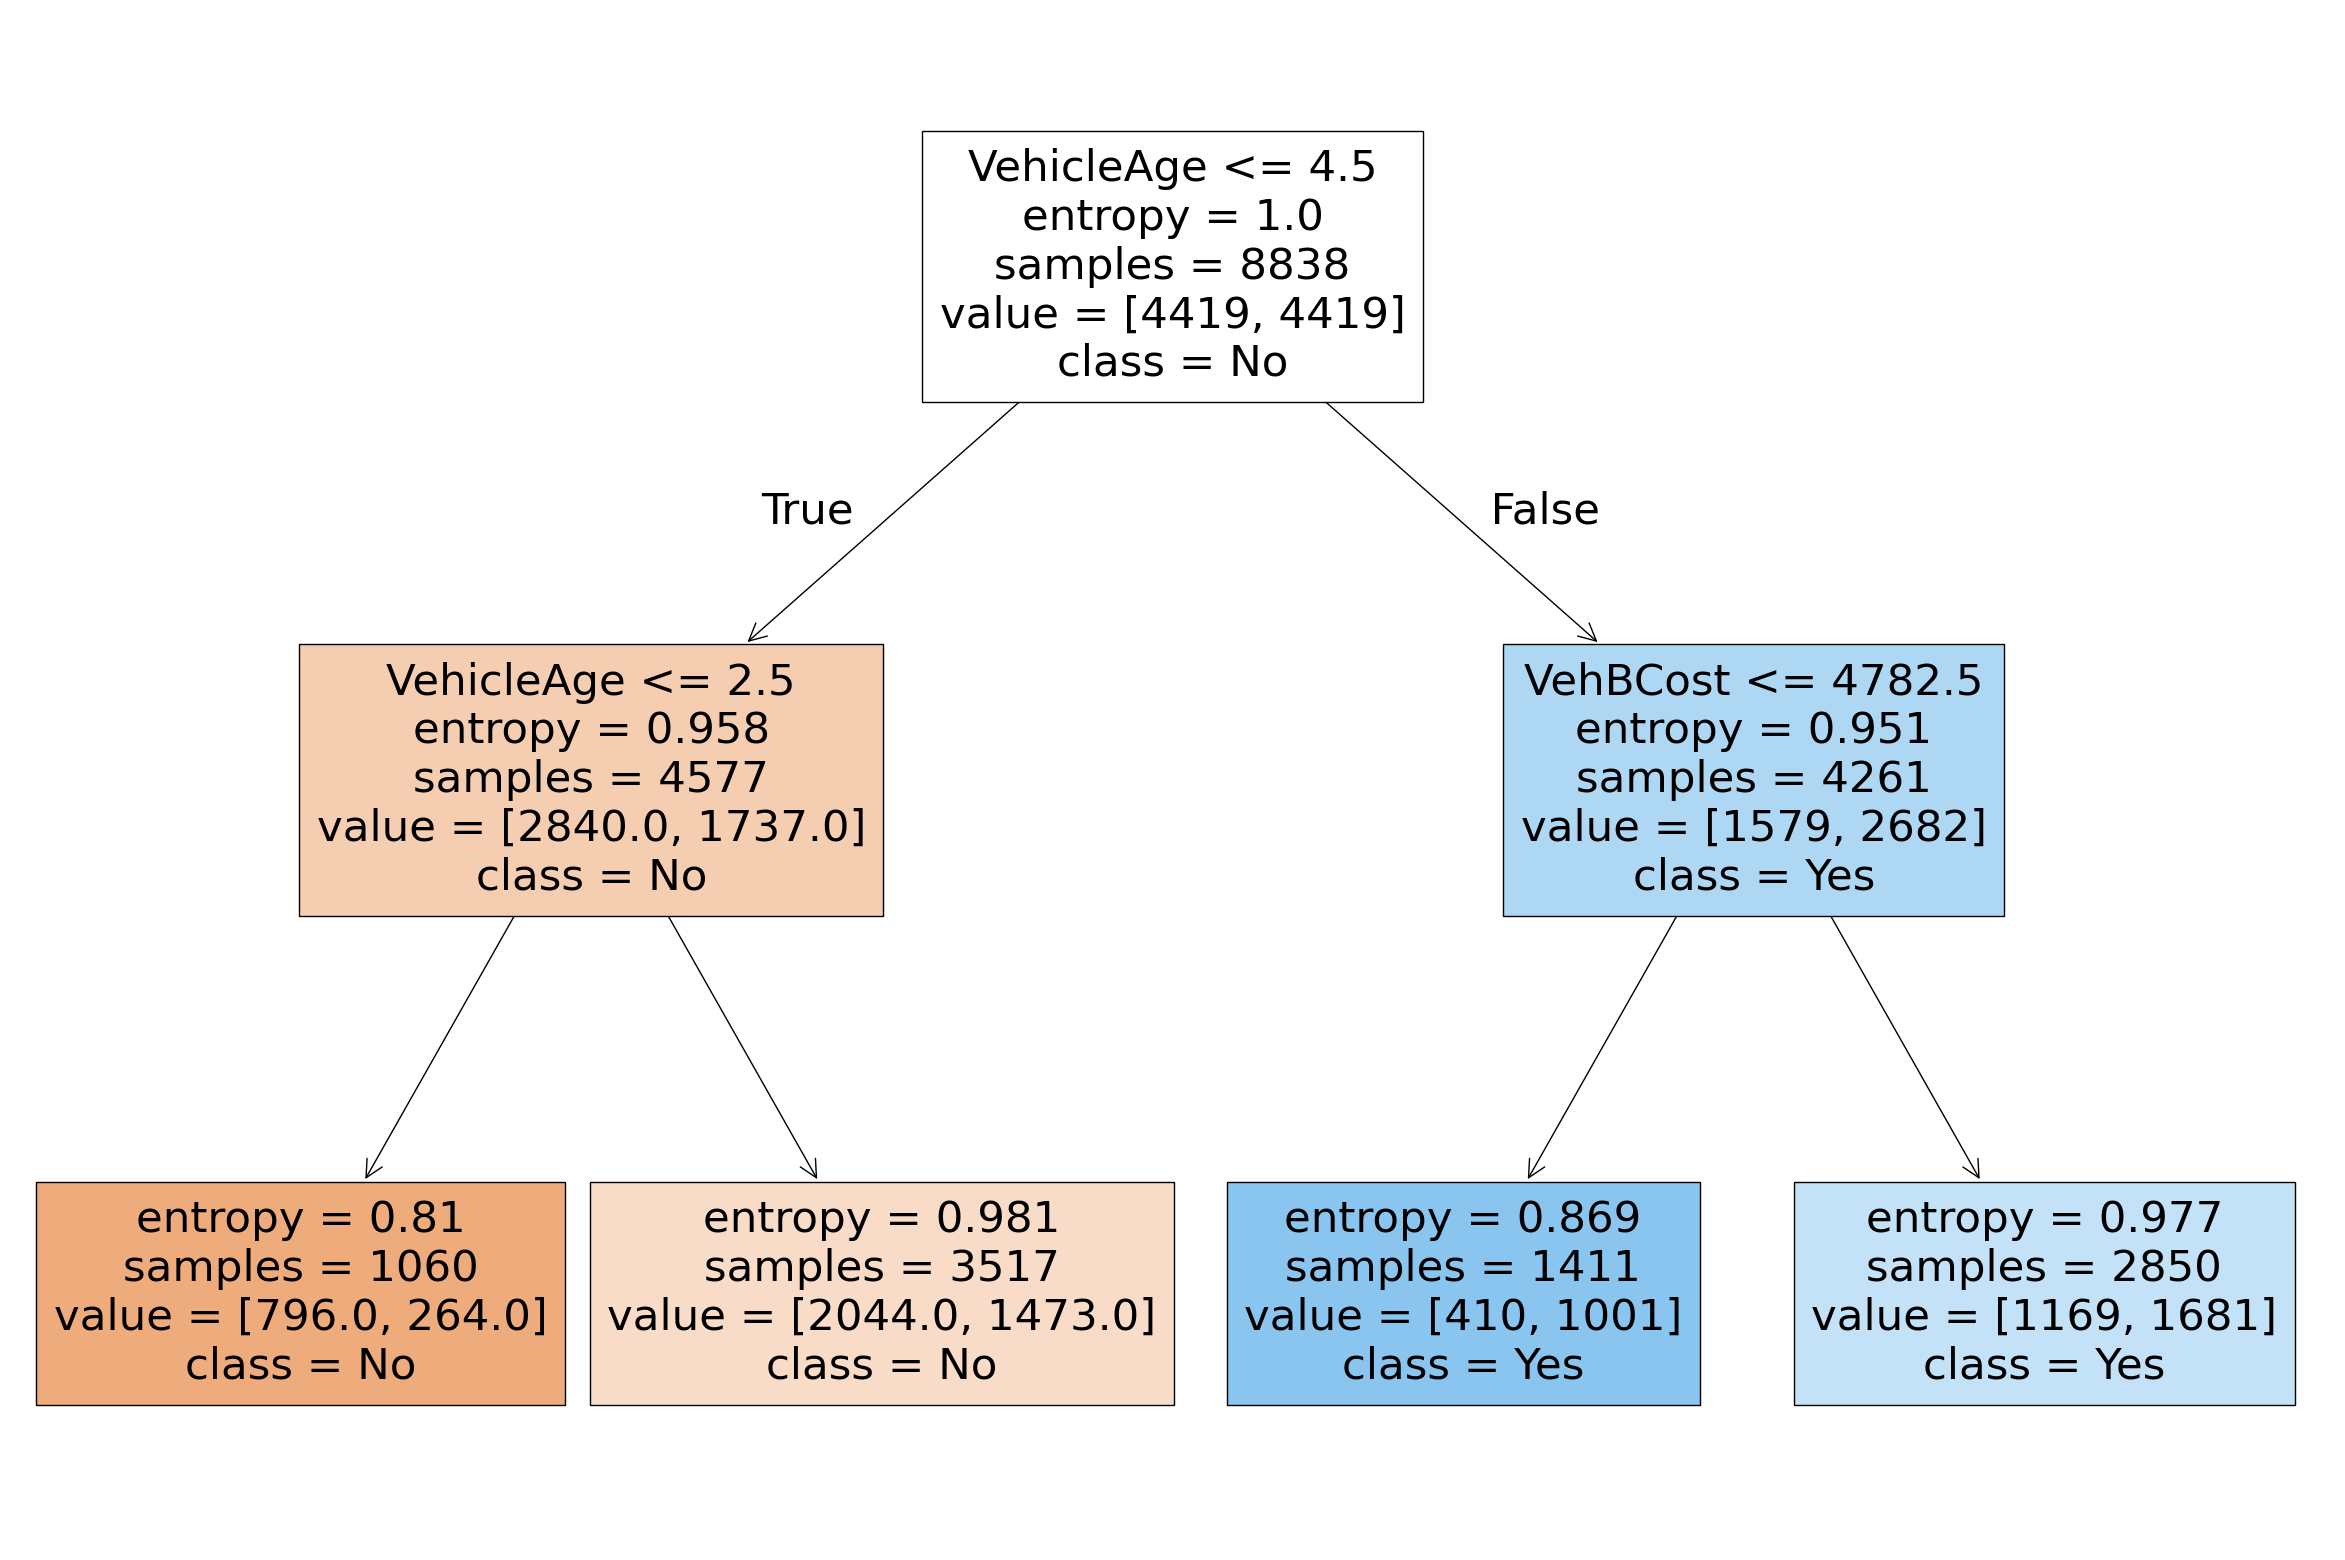

In [23]:
# Plot the tree (0.5 pts)
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [24]:
# Text version of decision tree (0.5 pts)
print(tree.export_text(model, feature_names=list(carAuction.columns)[1:]))

|--- VehicleAge <= 4.50
|   |--- VehicleAge <= 2.50
|   |   |--- class: No
|   |--- VehicleAge >  2.50
|   |   |--- class: No
|--- VehicleAge >  4.50
|   |--- VehBCost <= 4782.50
|   |   |--- class: Yes
|   |--- VehBCost >  4782.50
|   |   |--- class: Yes



Q1. How many decision nodes and how many leaf nodes are in the tree?  (0.5 pts)<br>
It appears as though there are three decision nodes and four leaf nodes

Q2. Compare to a decision tree with 7 decision nodes and 8 leaf nodes, is it more or less complex? Give reasons for your answer. (1 pt)<br>  It's less complex.  The reason is obvious, there are less options and less possible results


Q3. What is the predictor that first splits the tree? How the decision tree selects the first predictor to split? (1 pt)<br> Vehicle Age less than 4.5 years.  This was chosen because it is the option which when used reduces the entropy by the greatest amount

Q4. Find one path in the tree to a leaf node that is classified to IsBadBuy = 'Yes'. What is this path/rule's misclassification error rate? (1 pt)<br> The error rate would be the fraction created by the incorrect classifications divided by the total samples, so in this case that fraction would be 410/1411 or 0.29

In [25]:
# Make predictions on testing data (0.5 pts)
prediction_on_test = model.predict(predictors_test)

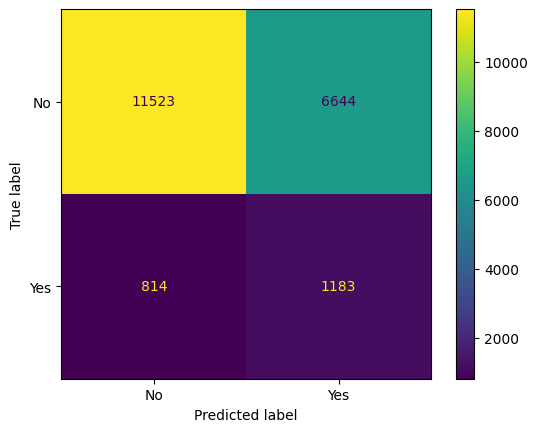

In [26]:
# Examine the evaluation results on testing data: confusion_matrix (0.5 pts)
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

Q5. On the testing set, how many bad buy cars are predicted as Not bad buy? (0.5 pts)<br>  This is very confusing.  I think it is 6644, but I am not confident.  I know the top left and bottom right are both correct so the answer is either 6644 or 814.  


In [27]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (0.5 pts)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.93      0.63      0.76     18167
         Yes       0.15      0.59      0.24      1997

    accuracy                           0.63     20164
   macro avg       0.54      0.61      0.50     20164
weighted avg       0.86      0.63      0.70     20164



Q6. Does the decision tree model have better performance on majority (IsBadBuy = 'No') or minority class (IsBadBuy = 'Yes')? why? (1 pt)<br>  It has better performance on the Majority (IsBadBuy = 'No')

Q7. Explain the overal performance of this model. Is this a good model? How can we improve it? (1 pt)  I would say the overall performance is bad, because the goal is to predict the bad buy cars, not to predict the good buy cars. that is easy.


In [28]:
!jupyter nbconvert --to html "/content/drive/MyDrive/IS470_lab/IS470_lab03.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/IS470_lab/IS470_lab03.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterA

Note, the previous command failed. I don't completely understand why, but i can verify by looking at my google drive and seeing that no file was generated in the location.  I added the following command aftwerward becasue i know it works.  (you might want to look into this for future assignments because some students are having issues with this)

In [29]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/IS470_lab03.ipynb" --to html --output "/content/drive/MyDrive/Output/IS470_lab03.html" --debug

[NbConvertApp] Searching ['/root/.jupyter', '/root/.local/etc/jupyter', '/usr/etc/jupyter', '/usr/local/etc/jupyter', '/etc/jupyter'] for config files
[NbConvertApp] Looking for jupyter_config in /etc/jupyter
[NbConvertApp] Looking for jupyter_config in /usr/local/etc/jupyter
[NbConvertApp] Looking for jupyter_config in /usr/etc/jupyter
[NbConvertApp] Looking for jupyter_config in /root/.local/etc/jupyter
[NbConvertApp] Looking for jupyter_config in /root/.jupyter
[NbConvertApp] Looking for jupyter_nbconvert_config in /etc/jupyter
[NbConvertApp] Looking for jupyter_nbconvert_config in /usr/local/etc/jupyter
[NbConvertApp] Looking for jupyter_nbconvert_config in /usr/etc/jupyter
[NbConvertApp] Looking for jupyter_nbconvert_config in /root/.local/etc/jupyter
[NbConvertApp] Looking for jupyter_nbconvert_config in /root/.jupyter
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IS470_lab03.ipynb to html
[NbConvertApp] Notebook name is '/content/drive/MyDrive/Output/